# Linear model for Boston

You try to process a very similar dataset to the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

## Sub dataset
- Data = structure with filled data
- m = number of rows = 100
- x's = input variable / features
- y's = output variable / target
- (x, y) = one row from training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

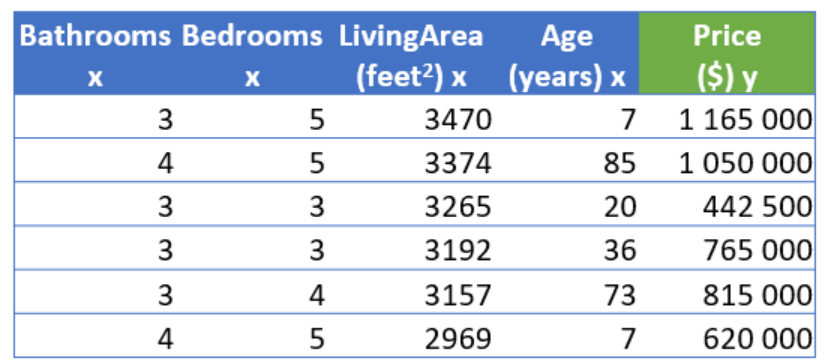

# Task
- Create a regression linearization model from the parameters you selected last exercise
- Standardize the data before processing
- Create the model manually
- Create the model using scikit-learn

# Data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:

data = pd.read_csv("../dataset/portland_filtered.csv", sep=';')

In [3]:
X = data[["bathrooms", "bedrooms", "livingArea", "age"]]
y = data["price"]


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Linear model without using libraries
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

In [6]:
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]   # add bias term
    theta = np.zeros(n + 1)
    loss_history = []

    for _ in range(epochs):
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradients = (2/m) * X_b.T.dot(errors)
        theta -= lr * gradients
        loss = np.mean(errors ** 2)
        loss_history.append(loss)

    return theta, loss_history


In [7]:
theta, loss_history = gradient_descent(
    X_train_scaled, y_train.values, lr=0.01, epochs=1000
)


In [8]:
theta


array([515525.28663239,  73533.87843883,  -3651.66342813,  77077.62673395,
        60524.05014355])

In [9]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

y_train_pred = predict(X_train_scaled, theta)
y_val_pred = predict(X_val_scaled, theta)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))


Train MSE: 9684404374.012417
Validation MSE: 21925415432.963223
Train R2: 0.638105616370326
Validation R2: 0.444196517513229


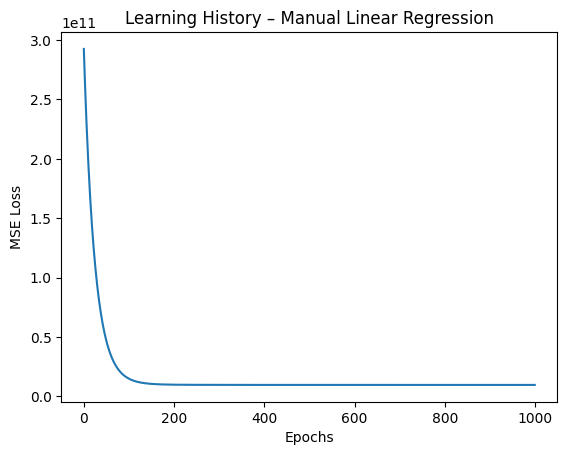

In [10]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Learning History – Manual Linear Regression")
plt.show()


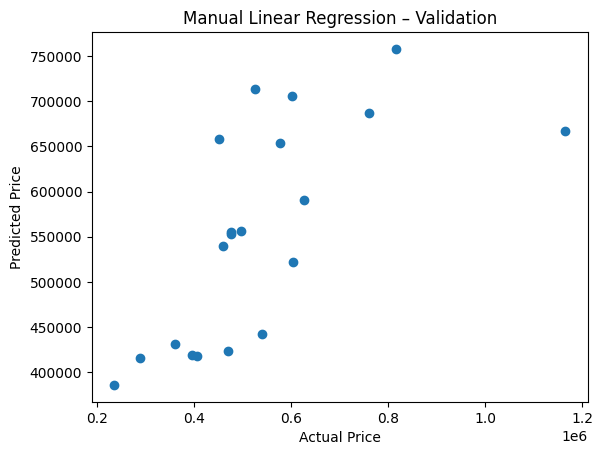

In [11]:
plt.scatter(y_val, y_val_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Manual Linear Regression – Validation")
plt.show()


# Linear model using scikit-learn
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [13]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 515525.2875
Coefficients: [73934.83979887 -3599.7199778  76728.76746034 60800.33941269]


In [14]:
y_train_pred_skl = model.predict(X_train_scaled)
y_val_pred_skl = model.predict(X_val_scaled)

print("Train MSE:", mean_squared_error(y_train, y_train_pred_skl))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred_skl))
print("Train R2:", r2_score(y_train, y_train_pred_skl))
print("Validation R2:", r2_score(y_val, y_val_pred_skl))


Train MSE: 9684333815.476156
Validation MSE: 21991132228.641228
Train R2: 0.6381082530567967
Validation R2: 0.44253061412328487


LinearRegression in scikit-learn uses a closed-form solution,
therefore no learning history per epoch exists.

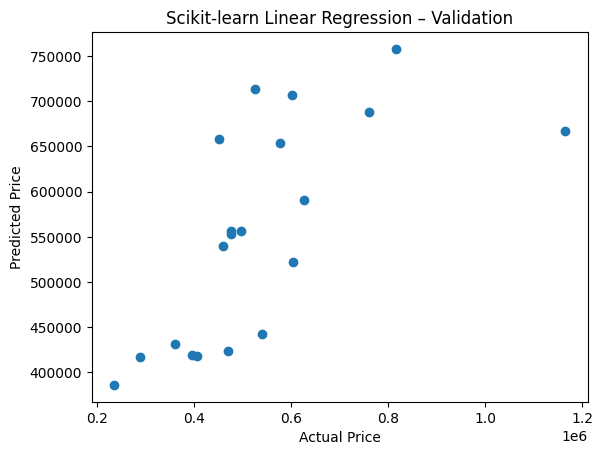

In [15]:
plt.scatter(y_val, y_val_pred_skl)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Scikit-learn Linear Regression – Validation")
plt.show()
